### <span style='font-family:Georgia'> ***ARJUN KC(8773456)***  </span>
###  <span style='font-family:Georgia'> ***Practical Lab 4 - Multivariate Linear and Polynomial Regression, and Evaluation using MAE and MAPE.*** </span>


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
sns.set_style("whitegrid")

 ###  <span style='font-family:Georgia'> ***Loading diabetics dataset***  </span>

In [2]:


X, y = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def model_estimation(model, y_train, y_test, y_pred_train, y_pred_test):
    """
    Evaluate the model using MAE. 
    Inputs:
        model: the model to be evaluated
        y_train: the true y values of the train dataset
        y_test: the true y values of the test dataset
        y_pred_train: the predicted y values of the train dataset
        y_pred_test: the predicted y values of the test dataset
    Returns:
        None. 
        Print the MAE of the train and test datasets and the equation of the model.
        Plots of the residuals, percentage error, and histogram of the percentage error.
    """
    # create three subplots in one row
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    # plot a scatter plot of the residuals
    ax1.scatter(y_test, y_test - y_pred_test)
    ax1.set_xlabel('$y_{test}$')
    ax1.set_ylabel('Residual $*(y_{test} - y_{pred}) / y_{test})$')
    ax1.set_title('Residuals')
    # plot a scatter plot of the percentage error
    ax2.scatter(y_test, 100. * (y_test - y_pred_test) / y_test)
    ax2.set_xlabel('$y_{test}$')
    ax2.set_ylabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax2.set_title('Percentage error (%)')
    # plot a histogram of the percentage error
    ax3.hist(100. * (y_test - y_pred_test) / y_test, bins=20)
    ax3.set_xlabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax3.set_ylabel('Frequency (number of test samples)')
    ax3.set_title('Histogram of percentage error (%)')

    print(f'Test Dataset: Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test):.2f}')
    print(f'Train Dataset: Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train):.2f}')

    # print the equation
    print('y = ', end='')
    for i, coef in enumerate(model.coef_):
        print(f'{coef:.2f} * x_{i} + ', end='')
    print(f'{model.intercept_:.2f}')
    fig.tight_layout()


###  <span style='font-family:Georgia'> ***Runing a Multivariate linear regression***  </span>

####  <span style='font-family:Georgia'> ***Using Linear Regression Model***  </span>

In [46]:
ln_model = LinearRegression()
ln_mdl = ln_model.fit(X_train,y_train)
ln_mdl

LinearRegression()

####  <span style='font-family:Georgia'> ***Predicting value***  </span>

In [47]:
y_train_predic_ln = ln_mdl.predict(X_train)
y_test_ln = ln_mdl.predict(X_test)

###  <span style='font-family:Georgia'> ***Calling the function***  </span>

Test Dataset: Mean Absolute Error: 42.79
Train Dataset: Mean Absolute Error: 43.48
y = 0.14 * x_0 + -23.06 * x_1 + 5.85 * x_2 + 1.20 * x_3 + -1.28 * x_4 + 0.81 * x_5 + 0.60 * x_6 + 10.16 * x_7 + 67.11 * x_8 + 0.20 * x_9 + -341.38


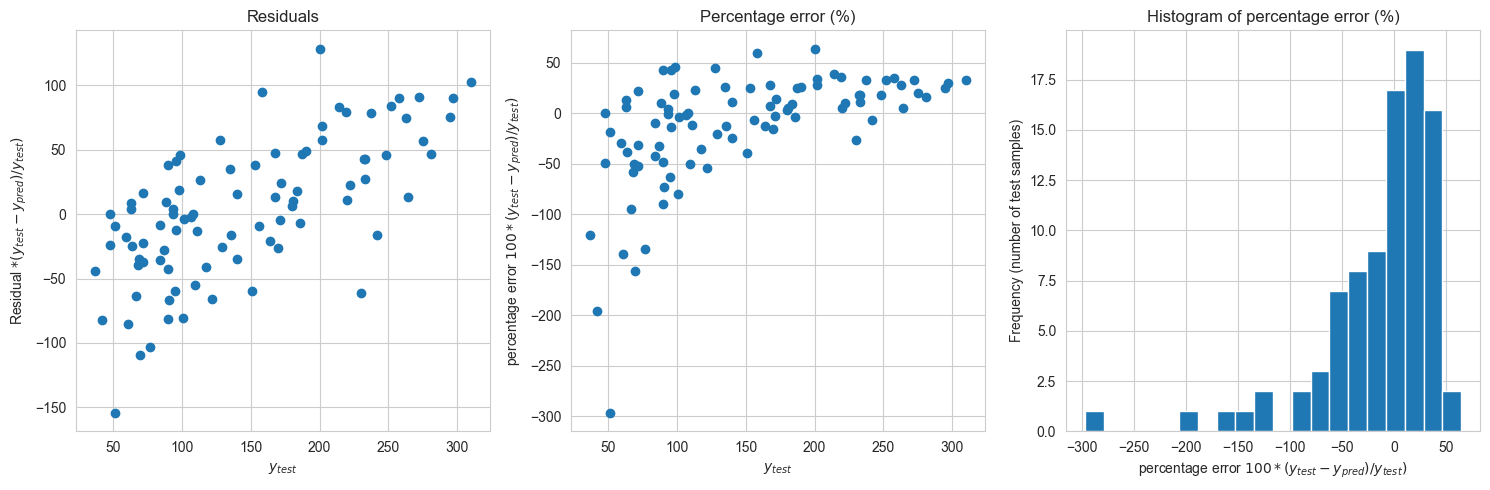

In [5]:
model_estimation(ln_mdl, y_train, y_test, y_train_predic_ln, y_test_ln)

###  <span style='font-family:Georgia'> ***Run a multivariate polynomial regression of the 2nd degree***  </span>

 ####  <span style='font-family:Georgia'> ***(Hint: set include_bias=False in PolynomialFeatures)***  </span>

#####  <span style='font-family:Georgia'> ***Note:- To convert the original features into their higher order terms we will use the PolynomialFeatures***  </span>

In [6]:
poly_Reg = PolynomialFeatures(degree=2, include_bias=False)  #second degree of polynomial regression
poly_Reg


PolynomialFeatures(include_bias=False)

In [7]:
x_poly_train = poly_Reg.fit_transform(X_train)
x_poly_test = poly_Reg.fit_transform(X_test)



####  <span style='font-family:Georgia'> ***Using Polynomial Regression Model***  </span>

In [8]:
polynom_Reg_mod= LinearRegression()
poly_reg_Mod = polynom_Reg_mod.fit(x_poly_train,y_train)


####  <span style='font-family:Georgia'> ***Predicting value***  </span>

In [9]:
y_poly_predic_train = poly_reg_Mod.predict(x_poly_train)
y_ploy_predic_test = poly_reg_Mod.predict(x_poly_test)


###  <span style='font-family:Georgia'> ***Calling the function***  </span>

Test Dataset: Mean Absolute Error: 43.58
Train Dataset: Mean Absolute Error: 39.14
y = -9.59 * x_0 + -11.24 * x_1 + -19.70 * x_2 + 10.64 * x_3 + -16.59 * x_4 + 26.14 * x_5 + 11.13 * x_6 + -160.29 * x_7 + -1768.67 * x_8 + -13.82 * x_9 + 0.03 * x_10 + 0.53 * x_11 + -0.05 * x_12 + 0.01 * x_13 + -0.00 * x_14 + -0.04 * x_15 + 0.08 * x_16 + 1.31 * x_17 + 0.41 * x_18 + 0.01 * x_19 + -33.71 * x_20 + 0.36 * x_21 + 0.41 * x_22 + 0.21 * x_23 + 0.25 * x_24 + -1.24 * x_25 + -26.74 * x_26 + 18.52 * x_27 + 0.27 * x_28 + 0.09 * x_29 + 0.12 * x_30 + -0.09 * x_31 + 0.12 * x_32 + -0.01 * x_33 + -1.43 * x_34 + 3.63 * x_35 + 0.02 * x_36 + -0.00 * x_37 + 0.09 * x_38 + -0.08 * x_39 + -0.11 * x_40 + -0.18 * x_41 + -2.48 * x_42 + -0.05 * x_43 + 0.18 * x_44 + -0.28 * x_45 + -0.31 * x_46 + -1.28 * x_47 + -5.05 * x_48 + -0.04 * x_49 + 0.11 * x_50 + 0.20 * x_51 + 0.37 * x_52 + 3.38 * x_53 + 0.03 * x_54 + 0.15 * x_55 + 2.20 * x_56 + 4.46 * x_57 + 0.12 * x_58 + 16.31 * x_59 + 15.19 * x_60 + 0.86 * x_61 + 273.67 * x_

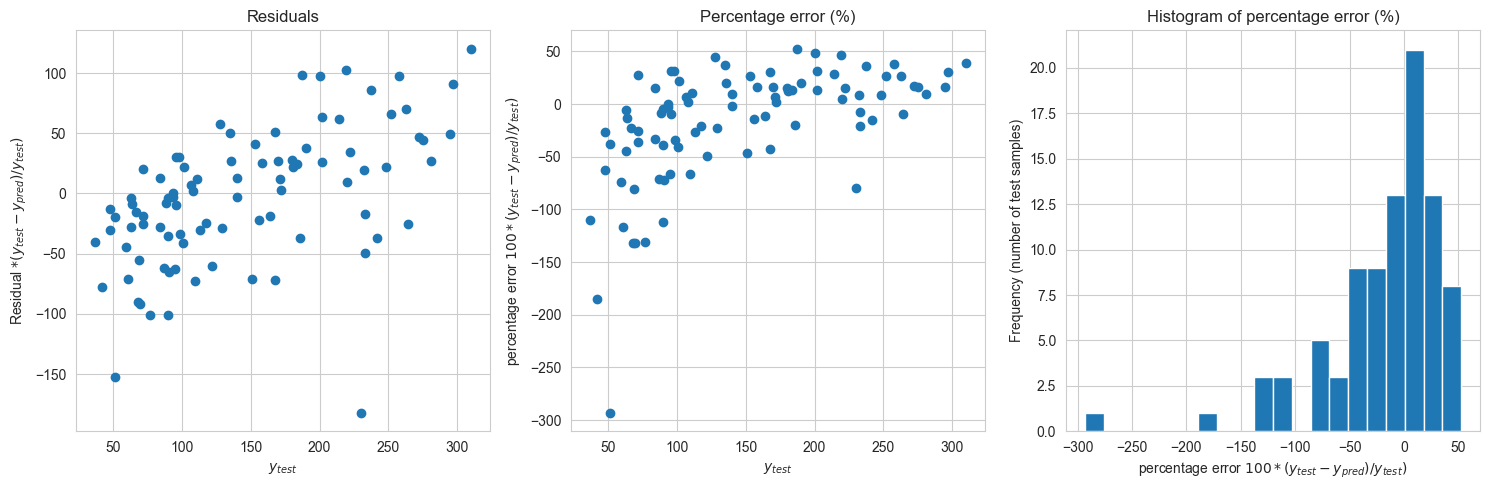

In [10]:
model_estimation(poly_reg_Mod,y_train,y_test,y_poly_predic_train,y_ploy_predic_test)

###  <span style='font-family:Georgia'> ***questions & answer***  </span>

###  <span style='font-family:Georgia'> ***1)How many parameters are we fitting for in linear regression and in the polynomial regression?***  </span>***  </span>

###  <span style='font-family:Georgia'> ***Parameter used for fitting linear regression***  </span>

In [19]:
X_train.shape 
print("Those are the parameters used for fitting linear regression:", list(X_train.columns))

Those are the parameters used for fitting linear regression: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


###  <span style='font-family:Georgia'> ***Parameter used for fitting  polynomial regression***  </span>

In [29]:
poly = poly_Reg.get_feature_names_out()
print(poly.shape)
print("Those are the parameters used for fitting polynomial regression:",list(poly))

(65,)
Those are the parameters used for fitting polynomial regression: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'age^2', 'age sex', 'age bmi', 'age bp', 'age s1', 'age s2', 'age s3', 'age s4', 'age s5', 'age s6', 'sex^2', 'sex bmi', 'sex bp', 'sex s1', 'sex s2', 'sex s3', 'sex s4', 'sex s5', 'sex s6', 'bmi^2', 'bmi bp', 'bmi s1', 'bmi s2', 'bmi s3', 'bmi s4', 'bmi s5', 'bmi s6', 'bp^2', 'bp s1', 'bp s2', 'bp s3', 'bp s4', 'bp s5', 'bp s6', 's1^2', 's1 s2', 's1 s3', 's1 s4', 's1 s5', 's1 s6', 's2^2', 's2 s3', 's2 s4', 's2 s5', 's2 s6', 's3^2', 's3 s4', 's3 s5', 's3 s6', 's4^2', 's4 s5', 's4 s6', 's5^2', 's5 s6', 's6^2']


##### <span style='font-family:Georgia'> ***From above code, we can observe that we used 10 parameters for Linear Regression and 65 parameters for polynomial regression. As there are are some parameters which are like bmi^2,bp^2s1^2s2^2s3^3,s4^2,s5^2;these are because of second order polynomial***  </span>

### <span style='font-family:Georgia'> ***2)Which model would you choose for deployment, and why?***  </span>

###  <span style='font-family:Georgia'> ***Metrics of Linear regression***  </span>

In [54]:
print("Test Data: Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_test_ln))
print("Train Data: Mean Absolute Error: ", metrics.mean_absolute_error(y_train,y_train_predic_ln))
print("\n")
print("Mean Sqaure Error: ",metrics.mean_squared_error(y_test,y_test_ln))
print("Mean Absoulte Error: ",metrics.mean_absolute_error(y_test,y_test_ln))
print("Root Mean Square Error: ",np.sqrt(metrics.mean_squared_error(y_test, y_test_ln)))
print("Mean Absolute Perecntage Error: ",metrics.mean_absolute_percentage_error(y_test, y_test_ln))

Test Data: Mean Absolute Error:  42.79409467959993
Train Data: Mean Absolute Error:  43.4835035239804


Mean Sqaure Error:  2900.1936284934795
Mean Absoulte Error:  42.79409467959993
Root Mean Square Error:  53.85344583676591
Mean Absolute Perecntage Error:  0.3749982636756112


###  <span style='font-family:Georgia'> ***Metrics of Polynomials regression***  </span>

In [56]:
print("Test Data: Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_ploy_predic_test))
print("Train Data: Mean Absolute Error: ", metrics.mean_absolute_error(y_train,y_poly_predic_train))
print("\n")
print("Mean Sqaure Error: ",metrics.mean_squared_error(y_test,y_ploy_predic_test))
print("Mean Absoulte Error: ",metrics.mean_absolute_error(y_test,y_ploy_predic_test))
print("Root Mean Square Error: ",np.sqrt(metrics.mean_squared_error(y_test, y_ploy_predic_test)))
print("Mean Absolute Perecntage Error: ",metrics.mean_absolute_percentage_error(y_test, y_ploy_predic_test))

Test Data: Mean Absolute Error:  43.58169325418069
Train Data: Mean Absolute Error:  39.14260998965843


Mean Sqaure Error:  3096.028307344242
Mean Absoulte Error:  43.58169325418069
Root Mean Square Error:  55.641965344012085
Mean Absolute Perecntage Error:  0.38285678513348165


##### <span style='font-family:Georgia'> ***The choice of the model for deployment depends on various factors and in this case we are using two model, if I have to choose among two model I would have gone for linear regression because Model Performance is good like MAE,MAPE and there is not too much difference on test and train data on linear regression so no overfitting***  </span>

###  <span style='font-family:Georgia'> ***3)What insights regarding the goodness-of-fit can you draw from the graphs provided by the function below, for each of the models?***  </span>

##### Residuals Scatter Plot:
#####     -) data are higly dispersed in polynomial as compared to linear model which gives less MAE for linear model
##### Percentage Error Scatter Plot:
#####         -)in linear model,the percentage error are randomly distributed around zero as compared to polynomial model and has less MAPE 
##### Histogram of Percentage Error:
#####         -) for linear model we can see distribution is skewed to the right where as for polynomial it has kind of symmetric.